## ML kaggle
source : https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=train.csv

Goal : learn the basics of sklearn and find insights in the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data_house_price = pd.read_csv("train.csv")
data_house_price.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data_house_price.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4]:
target_column = "SalePrice"

In [5]:
from pandas.api.types import is_numeric_dtype


In [6]:
numerical = data_house_price.drop(columns=["Id",target_column])
numerical = numerical.select_dtypes(include=['number'])
numerical = numerical.dropna(axis=1)

In [7]:
numerical

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,8450,7,5,2003,2003,706,0,150,856,...,548,0,61,0,0,0,0,0,2,2008
1,20,9600,6,8,1976,1976,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,2007
2,60,11250,7,5,2001,2002,486,0,434,920,...,608,0,42,0,0,0,0,0,9,2008
3,70,9550,7,5,1915,1970,216,0,540,756,...,642,0,35,272,0,0,0,0,2,2006
4,60,14260,8,5,2000,2000,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,7917,6,5,1999,2000,0,0,953,953,...,460,0,40,0,0,0,0,0,8,2007
1456,20,13175,6,6,1978,1988,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,2010
1457,70,9042,7,9,1941,2006,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,2010
1458,20,9717,5,6,1950,1996,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,2010


In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
model = LinearRegression()

In [10]:
y = data_house_price[[target_column]]
y

,SalePrice
0,208500
1,181500
2,223500
3,140000
4,250000
...,...
1455,175000
1456,210000
1457,266500
1458,142125


In [11]:
x = data_house_price[['LotArea']]
x

,LotArea
0,8450
1,9600
2,11250
3,9550
4,14260
...,...
1455,7917
1456,13175
1457,9042
1458,9717


In [12]:
model.fit(X=x,y=y)

LinearRegression()

In [13]:
a = model.coef_[0][0] # a 
a

2.0999719517076745

In [14]:
b = model.intercept_[0]# b
b

158836.1518968766

/home/arawn/.local/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


y = 2.1000*x+158836.1519


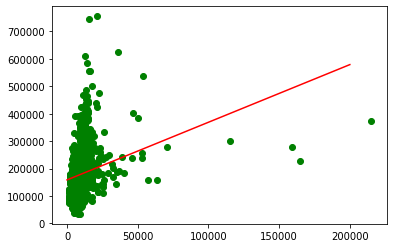

In [15]:
plt.scatter(x,y,color="green",)
x_test = np.arange(0,200000,0.1)
y_test = model.predict(pd.DataFrame(x_test))
plt.plot(x_test, y_test,c="red")
print(f"y = {a:.4f}*x+{b:.4f}")
plt.show()

Remark : The model isn't very precice ... 

In [16]:
from sklearn.metrics import mean_squared_log_error, r2_score , mean_squared_error

In [17]:
y_predict = model.predict(x)

In [18]:
mse_log = mean_squared_log_error(y_true=y,y_pred=y_predict)
mse_log

0.15119451125607988

In [33]:
models = []
for col in numerical.columns:
    model = LinearRegression()
    x = numerical[[col]]
    model.fit(x,y)
    y_predict = model.predict(x)
    y_predict = np.clip(y_predict,0,None)
    mse_log = mean_squared_log_error(y_true=y,y_pred=y_predict)

    models.append((col,mse_log,model))

In [36]:
Tableu_models = pd.DataFrame(models,columns=["col","mse","model"])

In [48]:
best_model = Tableu_models.sort_values("mse").iloc[0]["model"]
best_colum = Tableu_models.sort_values("mse").iloc[0]["col"]
best_colum

'GrLivArea'

y = 2.1000*x+158836.1519


/home/arawn/.local/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


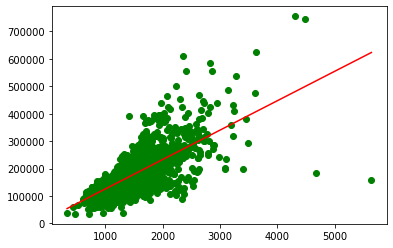

In [68]:
X = numerical[[best_colum]]
plt.scatter(X,y,color="green",)
x_test = np.arange(int(X.min()),int(X.max()),1)
y_test = best_model.predict(pd.DataFrame(x_test))
plt.plot(x_test, y_test,c="red")
print(f"y = {a:.4f}*x+{b:.4f}")
plt.show()

In [67]:
np.arange(int(X.min()),int(X.max()),1)

array([ 334,  335,  336, ..., 5639, 5640, 5641])

In [59]:
X.max()

GrLivArea    5642
dtype: int64

### First submit in kaggle

In [69]:
test = pd.read_csv("test.csv")

In [72]:
pred_best = best_model.predict(test[[best_colum]])

In [85]:
pred_best = pred_best.reshape(-1)

In [91]:
submit = pd.DataFrame({"Id": test["Id"], "SalePrice": pred_best,})

In [92]:
submit.to_csv("result.csv",index=False)